In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_dataput_data

In [12]:
# Loading data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [13]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001ECD2E76F28>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001ECC81B97B8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x000001ECD305EFD0>)

In [14]:
mnist.train.images.shape # 28x28 flattend images

(55000, 784)

In [15]:
mnist.test.images.shape

(10000, 784)

In [16]:
mnist.validation.images.shape

(5000, 784)

In [17]:
mnist.train.labels.shape # Integer values ranging from 0 to 9

(55000, 10)

In [19]:
# Since it is a multiclassification problem, the Y labels should be one hot
# encoded
mnist.train.labels[0] # 7

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

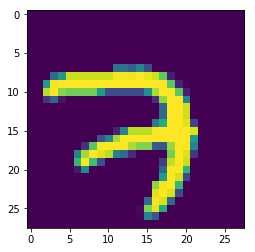

In [21]:
import numpy as np
import matplotlib.pyplot as plt
# plot image
first_image = mnist.train.images[0]

# Unflatten
first_image = np.array(first_image, dtype="float")
first_image = first_image.reshape((28, 28))

plt.imshow(first_image)
plt.show()

## Initializing weights and biases

We will be using the following Neural Network Architecture.

Input layer (784 units) => Hidden1 (256 units) => Hidden2 (256 units) => Output Layer (10 units)

Initializing Weights and biases, these will be variables as they will be modified during back propagation.

In [22]:
n_input = 784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10

# Dictionary for weights
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

# Dictionary for biases
biases = {
    'h1': tf.Variable(tf.random_normal([n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

Instructions for updating:
Colocations handled automatically by placer.


## Forward Propagation

Hidden Layer 1 => Activation function ReLu
Hidden Layer 2 => Activation function ReLu
Output Layer => None

In [23]:
def forward_propagation(x, weights, biases):
    in_layer1 = tf.add(tf.matmul(x, weights['h1']), biases['h1'])
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1, weights['h2']), biases['h2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2, weights['out']), biases['out'])
    
    return output

## Predictions and Accuracy
Using only forward propagation, no optimization

In [24]:
# Creating placeholders for data
x = tf.placeholder('float', [None, n_input])
y = tf.placeholder(tf.int32, [None, n_classes])
pred = forward_propagation(x, weights, biases)
# Get max index of each row to predict digit
# predictions = tf.argmax(pred, 1)
# correct_labels = tf.argmax(y, 1)

# # Running session
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
# predicitons_evaluated = sess.run(predictions, feed_dict={x:mnist.test.images})

In [25]:
#predicitons_evaluated # Completely random

array([2, 7, 2, ..., 8, 7, 8], dtype=int64)

In [26]:
#correct_labels_evaluated = sess.run(correct_labels, feed_dict={y: mnist.test.labels})
#correct_labels_evaluated

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [29]:
# Checking accuracy
# correct_predictions = tf.equal(predictions, correct_labels)
# correct_predictions_eval = sess.run(correct_predictions, feed_dict={x:mnist.test.images,
#                                                                     y: mnist.test.labels})
# correct_predictions_eval

array([False, False, False, ..., False, False, False])

In [31]:
# correct_predictions_eval.sum()

932

## Cost and Optimizing Cost

In TF we just need to find the cost and then run the optimizer.

In [32]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [36]:
# Creating our optimizer and minimizing the cost
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
optimize = optimizer.minimize(cost)

In [48]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [49]:
# Batch Gradient descent
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(num_batches):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        cost_eval, _ = sess.run([cost, optimize], feed_dict={x:batch_x, y:batch_y})
        total_cost += cost_eval
    print(total_cost)

26168.96310043335
5484.496074222028
2860.0775066996844
2023.5715468555995
1532.4524658085104
1348.3492226286228
1159.9452681363841
984.9591426555652
943.589702459885
737.5619286517137
736.8238350306827
584.0649867826648
661.225209658293
509.7321857918069
401.9907383127958
377.4658366934291
381.5887111075339
314.6248240909661
297.07538601684223
293.68225476302047
250.08512847805972
311.61705127723604
234.0187899748922
146.18669813750586
158.5253745947191


In [50]:
#Get max index of each row to predict digit
predictions = tf.argmax(pred, 1)
correct_labels = tf.argmax(y, 1)
correct_predictions = tf.equal(predictions, correct_labels)
predictions, correct_predictions = sess.run([predictions, correct_predictions], 
                                            feed_dict={x:mnist.test.images, y:mnist.test.labels})

correct_predictions.sum() # 9592 / 10000 correct

9592